In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [4]:
import numpy as np

In [25]:
import matplotlib.pyplot as plt

In [32]:
from tqdm import tqdm

In [ ]:
%matplotlib inline

In [5]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [6]:
from sklearn.linear_model import LinearRegression, Ridge

In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [8]:
file_path = r"F:\Data_Science_Jupyter_Files\laptop_pricing_dataset_mod2 (1).csv"

In [9]:
df = pd.read_csv(file_path, header=0)

In [10]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [11]:
df.drop(["Unnamed: 0.1", "Unnamed: 0"], axis=1, inplace=True)
df.head()

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [12]:
y_data = df["Price"]

In [13]:
x_data = df.drop("Price", axis=1)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)
print("number of test samples:", x_test.shape[0])
print("number of training samples", x_train.shape[0])

number of test samples: 24
number of training samples 214


In [15]:
lre = LinearRegression()

In [16]:
lre.fit(x_train[["CPU_frequency"]], y_train)

LinearRegression()

In [18]:
lre.score(x_train[["CPU_frequency"]], y_train)

0.14829792099817984

In [17]:
lre.score(x_test[["CPU_frequency"]], y_test)

-0.06599437350393811

In [19]:
Rcross = cross_val_score(lre, x_data[["CPU_frequency"]], y_data, cv=4)
Rcross

array([-0.82012763,  0.10035872,  0.11202939, -0.03662978])

In [20]:
print("mean of the folds are", Rcross.mean(), "and standard deviation is", Rcross.std())

mean of the folds are -0.16109232388595096 and standard deviation is 0.3849579786664708


In [22]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.50, random_state=0)

In [23]:
lre = LinearRegression()
Rsqu_test = []
order = [1,2,3,4,5]
for n in order:
    pr=PolynomialFeatures(degree=n)
    x_train_pr=pr.fit_transform(x_train[["CPU_frequency"]])
    x_test_pr=pr.fit_transform(x_test[["CPU_frequency"]])
    lre.fit(x_train_pr, y_train)
    Rsqu_test.append(lre.score(x_test_pr, y_test))

Text(0.5, 1.0, 'R^2 using test data')

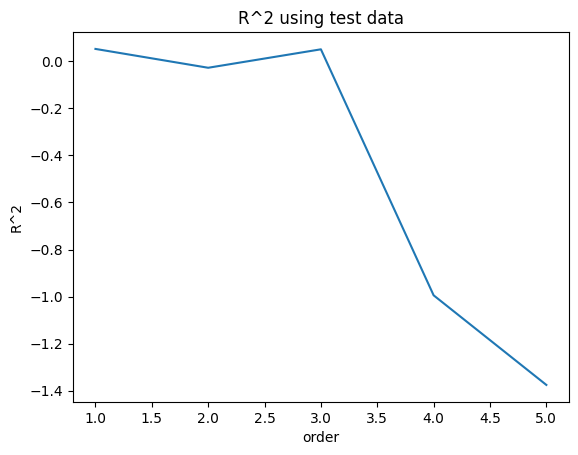

In [26]:
plt.plot(order, Rsqu_test)
plt.xlabel("order")
plt.ylabel("R^2")
plt.title("R^2 using test data")

In [27]:
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [30]:
x_train_pr=pr.fit_transform(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])
x_test_pr=pr.fit_transform(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])

In [33]:
rsqu_test = []
rsqu_train = []
Alpha = np.arange(0.001,1,0.001)
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha = alpha)
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    pbar.set_postfix({"Test Score:": test_score, "Train Score": train_score})
    rsqu_test.append(test_score)
    rsqu_train.append(train_score)
    

100%|█████████████████████████████████████████| 999/999 [00:09<00:00, 100.73it/s, Test Score:=0.423, Train Score=0.669]


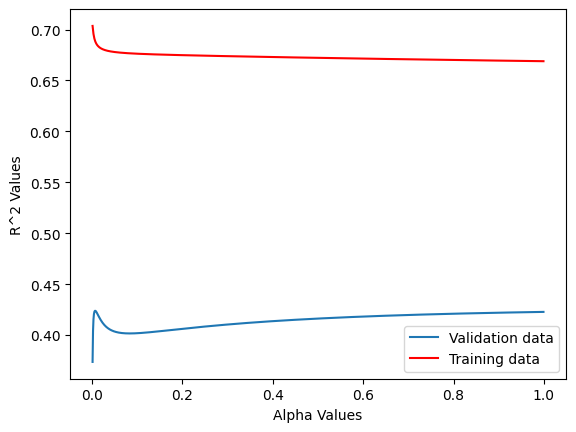

In [36]:
plt.plot(Alpha, rsqu_test, label="Validation data")
plt.plot(Alpha, rsqu_train, "r", label="Training data")
plt.xlabel("Alpha Values")
plt.ylabel("R^2 Values")
plt.legend()

In [37]:
# identifying the value of alpha for which the model performs best
parameters1 = [{"alpha":[0.0001,0.001,0.01, 0.1, 1, 10]}]

In [42]:
RR = Ridge()
Grid1 = GridSearchCV(RR, parameters1, cv=4)
Grid1.fit(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']], y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}])

In [43]:
BestRR = Grid1.best_estimator_
print(BestRR.score(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU','Category']], y_test))

0.300990504869182
